<a href="https://colab.research.google.com/github/lapshinaaa/homework_machineLearning/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
!wget "https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw03-plots/german_credit.csv"

--2023-03-01 17:12:29--  https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw03-plots/german_credit.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw03-plots/german_credit.csv [following]
--2023-03-01 17:12:30--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw03-plots/german_credit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275201 (269K) [text/plain]
Saving to: ‘german_credit.csv’

german_credit.csv   100%[===================>] 268.75K  --.-KB/s    in 0.04s   

2023-03-01 17:12:30 (6.84 MB/s) 

In [3]:
data = pd.read_csv("german_credit.csv")

data.head(5)
#data.tail(5)
#data.shape  output: (1000, 21)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
# check for missing values
data.isna().sum()   # -> no missing values found

# В общей беседе один из ассистентов сказал, что можно вручную буквально описать, что и к какой группе мы относим. Предлагаю такой вариант:

# target variable (целевая переменная): credit_risk (good/bad) - also binary (бинарная)

# numeric data (числовые признаки): duration, amount, age

# binary data (бинарные признаки): telephone (yes/no), foreign_worker (yes/no)

# следующие признаки отнесены к порядковым, так как возможно их внутренне ранжирование и сравнение. В беседе видела спор по поводу признака 'people liable',
# который кто-то хотел отнести к бинарным. Тот факт, что в таблице он имеет только 2 значения не делает, как мне кажется, его бинарным. По моему мнению, он, очевидно,
# больше относится к порядковым признакам.
# ordinal data (порядковые признаки): status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable

# следующие признаки отнесены к категориальным, поскольку имеют несколько значений (точно НЕ бинарные) и невозможно их внутреннее ранжирование/сравнение между собой
# categorical data (категориальные признаки): credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby('purpose')['amount'].apply(np.mean)

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
# first question:
print((data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[data['age'] < 30].shape[0]) * 100)

# second question:
print((data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[data['age'] > 40].shape[0]) * 100)

66.66666666666666
68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
data.loc[(data['foreign_worker'] == 'yes') & (data['number_credits'] != '1') & (data['number_credits'] != '2-3'), 'foreign_worker'].count()

1

### Задание 6 (1 балл)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

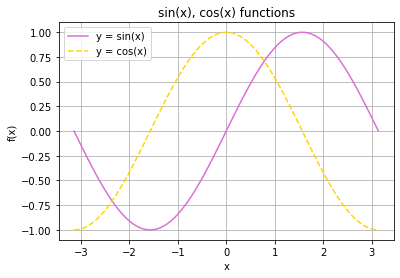

In [7]:
plt.title("sin(x), cos(x) functions")

x = np.linspace(-np.pi, np.pi, 100)
sinx = np.sin(x)
cosx = np.cos(x)

plt.plot(x, sinx, label = 'y = sin(x)', color = 'orchid')
plt.plot(x, cosx, linestyle='dashed', label = 'y = cos(x)', color = 'gold')

# naming the axes
plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
plt.grid(True)
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

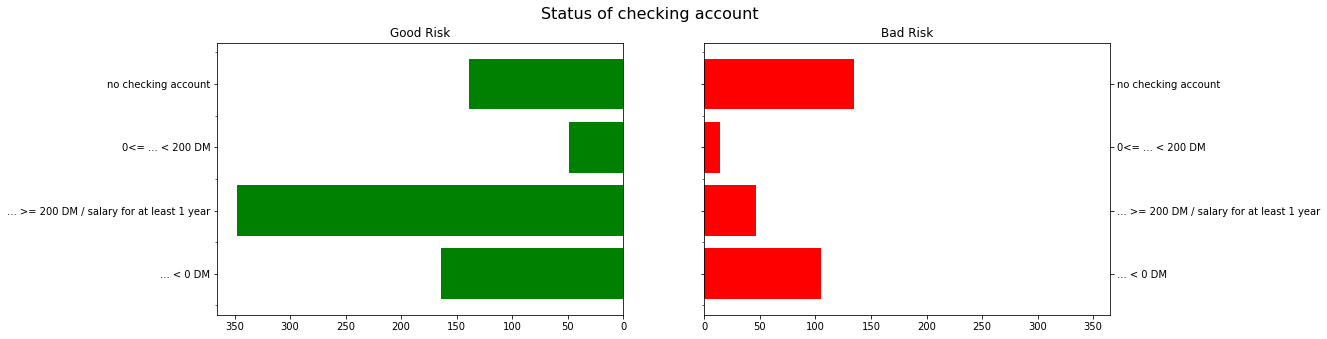

In [ ]:
# firstly, grouping the data for good and bad cases
good_grouped = data[data['credit_risk'] == 'good'].groupby(['status', 'credit_risk']).size().unstack()
bad_grouped = data[data['credit_risk'] == 'bad'].groupby(['status', 'credit_risk']).size().unstack()

fig, ax = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)
fig.suptitle("Status of checking account", fontsize=16)

# plotting all the data for good cases
good_grouped.plot(kind='barh', stacked=True, ax=ax[0], color='green', legend=False, width=0.8)
ax[0].set_title('Good Risk')

# set the x-axis limits of the second plot to be the same as the first one
ax[1].set_xlim(ax[0].get_xlim())
ax[0].invert_xaxis() # inverting the x-axis (they have to mirror each other according to the task)

# plotting all the data for bad cases
bad_grouped.plot(kind='barh', stacked=True, ax=ax[1], color='red', legend=False, width=0.8)
ax[1].set_title('Bad Risk')

# adjusting the visibility of the y-ticks and tick labels for the right subplot (sharey parameter removed the y ticks for the second subplot)
ax[1].tick_params(axis='y', labelright=True, right = True)

ax[0].set_ylabel(None)
ax[1].set_ylabel(None)

plt.show()

# Выводы: наибольшее количество успешных кейсов наблюдается при наличии у заявителя
# более чем 200 марок/месяц в качестве зарплаты на протяжении года. При отсутствии каких-либо данных об аккаунте заявителя
# наблюдается самый большой риск невозвращения средств.

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

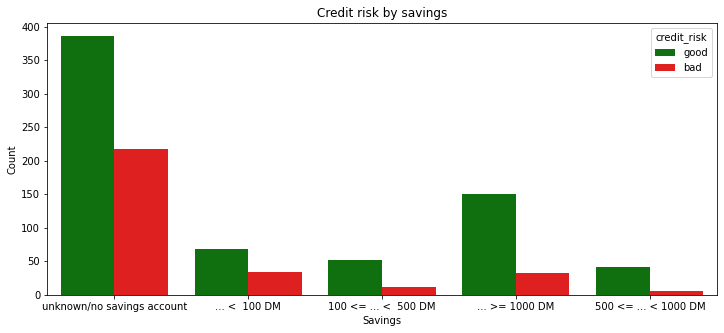

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

colors = {'good': 'green', 'bad': 'red'} #  defining the colors for each subplot

# plotting count of savings for each credit risk value
sns.countplot(x='savings', hue='credit_risk', data=data, palette = colors, ax=ax)

# setting plot title and axis labels
plt.title('Credit risk by savings')
plt.xlabel('Savings')
plt.ylabel('Count')

plt.show()

# При отсутствии каких-либо сбережений наблюдается самый высокий риск невозвращения кредита. 
# Кроме того, при наличии у заявителя на счету более 1000 марок, риск возвращения средств очень высок.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

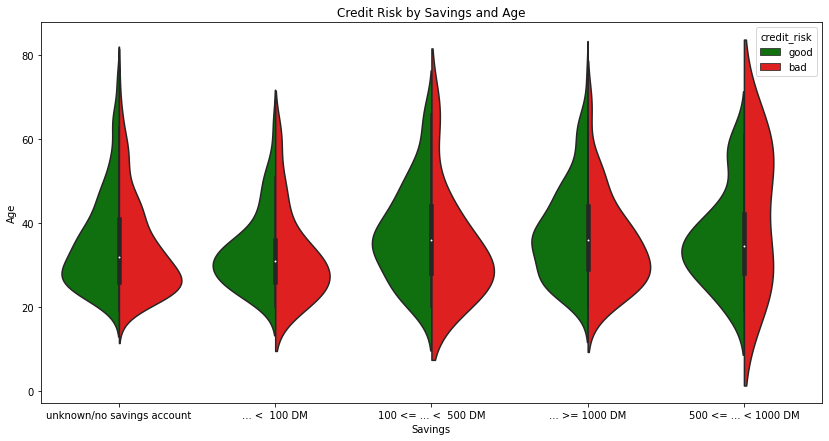

In [ ]:
# create subplots with a custom size
fig, ax = plt.subplots(figsize=(14, 7))

colors = {'good': 'green', 'bad': 'red'} #  defining the colors for each subplot

sns.violinplot(x = 'savings', y = 'age', hue = 'credit_risk', data = data, palette = colors, ax = ax, split = True)

plt.title('Credit Risk by Savings and Age')
plt.xlabel('Savings')
plt.ylabel('Age')

plt.show()

# Анализируя график, можно отметить, что наилучший риск возврата кредита наблюдается у заявителей в возрасте
# 20-45 лет. С увеличением возраста и уменьшением денег на счету, уменьшается вероятность возврата средств кредитуемым. 

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

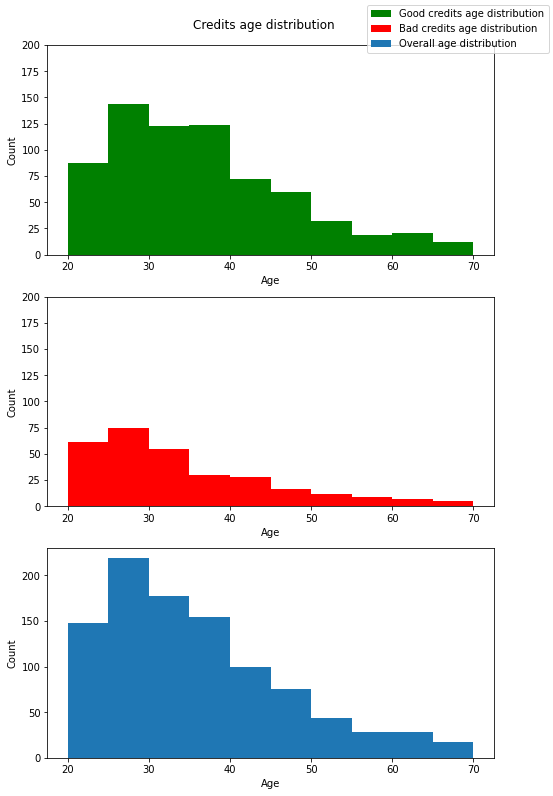

In [ ]:
# separating data into two categories
good_risk = data[data['credit_risk'] == 'good']
bad_risk = data[data['credit_risk'] == 'bad']

fig, axs = plt.subplots(nrows=3, figsize=(8, 12))

fig.suptitle('Credits age distribution')

# plotting histograms for good and bad credit risk  (using [] method so that if needed iteration can be performed)
axs[0].hist(good_risk['age'], color='green', range=(20, 70), label='Good credits age distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[0].set_ylim([0, 200])

axs[1].hist(bad_risk['age'], color='red',range=(20, 70), label='Bad credits age distribution')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count')
axs[1].set_ylim([0, 200])

# plotting histograms for overall age distribution
axs[2].hist(data['age'], range=(20, 70), label='Overall age distribution')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Count')

fig.legend()
fig.subplots_adjust(top=0.95)  # the spacing above the first subplot was too big, so I manually fixed it

plt.show()

# Как видно из данной гистограммы, наибольшее количество заявителей были в возрасте 20-40 лет. В этом возрастном интервале наблюдается
# как самый большой риск выдачи кредита (так как, вероятно, его погасят успешно), так и его невыдачи.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

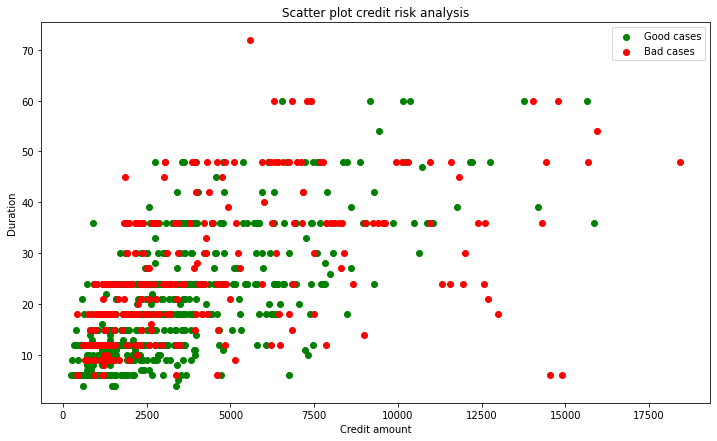

In [ ]:
# separate the data by credit risk
good_data = data[data['credit_risk'] == 'good']
bad_data = data[data['credit_risk'] == 'bad']

# create a new figure with a larger size
plt.figure(figsize=(12,7))

# create a scatter plot for good and bad credit risk data
plt.scatter(good_data['amount'], good_data['duration'], color='green', label='Good cases')
plt.scatter(bad_data['amount'], bad_data['duration'], color='red', label='Bad cases')

# set the x and y labels
plt.xlabel('Credit amount')
plt.ylabel('Duration')


plt.legend()
plt.title('Scatter plot credit risk analysis')
plt.show()

# Анализируя данную диаграмму рассеивания, можно отметить, что наибольшее количество отрицательных кейсов наблюдается 
# для кредитов в размере от 500 до 7500 у.е. Здесь же сосредоточено и наибольшее количество положительных кейсов, что говорит
# о том, что заявители чаще всего запрашивали сумму из этого интервала. 

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

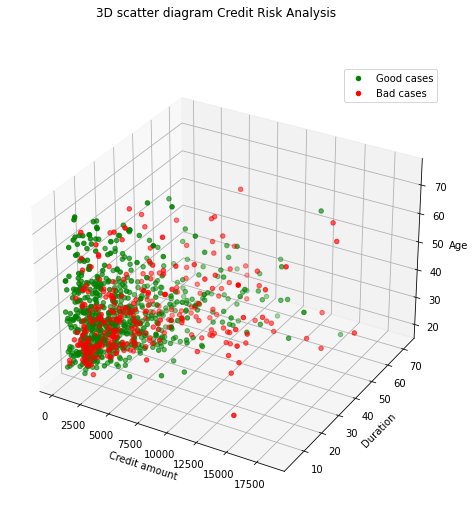

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d') # preparing a 3D space for a scatter plot

# separate the data by credit risk
good_data = data[data['credit_risk'] == 'good']
bad_data = data[data['credit_risk'] == 'bad']

fig.suptitle('3D scatter diagram Credit Risk Analysis')

# create a scatter plot for good credit risk data
ax.scatter(good_data['amount'], good_data['duration'], good_data['age'], color='green', label='Good cases')

# create a scatter plot for bad credit risk data
ax.scatter(bad_data['amount'], bad_data['duration'], bad_data['age'], color='red', label='Bad cases')

# setting all the necessary labels
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

ax.legend()
plt.show()

# Диаграмма в данном случае показывает аналогичные предыдущие диаграмме данные, однако, также учитывает возраст заявителей.
# Здесь также видно, что наибольшее количество положительных кейсов сосредоточено в районе небольшой суммы, независимо от возраста заявителя. 

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [10]:
# replacing values in binary columns with {0, 1} values (drop_first = True drops one of the resulting binary indicator variables for each categorical feature):
data = pd.get_dummies(data, columns=["foreign_worker", 'telephone', 'credit_risk'], drop_first=True)
data.head()  # demonstrating the result

,duration,credit_history,purpose,amount,personal_status_sex,other_debtors,property,age,other_installment_plans,housing,...,status,savings,employment_duration,installment_rate,present_residence,number_credits,people_liable,foreign_worker_yes,telephone_yes (under customer name),credit_risk_good
0,18,all credits at this bank paid back duly,car (used),1049,female : non-single or male : single,none,car or other,21,none,for free,...,3.0,4.0,2.0,2.0,3.0,0.0,0.0,0,0,1
1,9,all credits at this bank paid back duly,others,2799,male : married/widowed,none,unknown / no property,36,none,for free,...,3.0,4.0,0.0,1.0,0.0,1.0,1.0,0,0,1
2,12,no credits taken/all credits paid back duly,retraining,841,female : non-single or male : single,none,unknown / no property,23,none,for free,...,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0,0,1
3,12,all credits at this bank paid back duly,others,2122,male : married/widowed,none,unknown / no property,39,none,for free,...,3.0,4.0,0.0,0.0,0.0,1.0,1.0,1,0,1
4,12,all credits at this bank paid back duly,others,2171,male : married/widowed,none,car or other,38,bank,rent,...,3.0,4.0,0.0,2.0,3.0,1.0,0.0,1,0,1


In [9]:
# replacing values in the columns with ordinal data:
from sklearn.preprocessing import OrdinalEncoder

# specifying the columns with ordinal data:
ordinal_columns = data[['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'people_liable']]

# creating an instance of OrdinalEncoder and fitting it to the ordinal data (that I manually selected previously)
encoder = OrdinalEncoder()
encoder.fit(ordinal_columns)

# transforming the ordinal data using the encoder
encoded_data = encoder.transform(ordinal_columns)

# creating a new data frame with the encoded data and the non-ordinal columns
data = pd.concat([data.drop(columns=ordinal_columns.columns), pd.DataFrame(encoded_data, columns=ordinal_columns.columns)], axis=1)

data.head()

,duration,credit_history,purpose,amount,personal_status_sex,other_debtors,property,age,other_installment_plans,housing,...,telephone,foreign_worker,credit_risk,status,savings,employment_duration,installment_rate,present_residence,number_credits,people_liable
0,18,all credits at this bank paid back duly,car (used),1049,female : non-single or male : single,none,car or other,21,none,for free,...,no,no,good,3.0,4.0,2.0,2.0,3.0,0.0,0.0
1,9,all credits at this bank paid back duly,others,2799,male : married/widowed,none,unknown / no property,36,none,for free,...,no,no,good,3.0,4.0,0.0,1.0,0.0,1.0,1.0
2,12,no credits taken/all credits paid back duly,retraining,841,female : non-single or male : single,none,unknown / no property,23,none,for free,...,no,no,good,0.0,0.0,1.0,1.0,3.0,0.0,0.0
3,12,all credits at this bank paid back duly,others,2122,male : married/widowed,none,unknown / no property,39,none,for free,...,no,yes,good,3.0,4.0,0.0,0.0,0.0,1.0,1.0
4,12,all credits at this bank paid back duly,others,2171,male : married/widowed,none,car or other,38,bank,rent,...,no,yes,good,3.0,4.0,0.0,2.0,3.0,1.0,0.0


In [11]:
# removing all the columns with categorical data 

data = data.drop(columns = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'])

print(data.columns.tolist()) #  showing that the categorical data was, indeed, removed

['duration', 'amount', 'age', 'status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'people_liable', 'foreign_worker_yes', 'telephone_yes (under customer name)', 'credit_risk_good']


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [12]:
from sklearn.preprocessing import LabelEncoder

# rescale the features using intervals so that overfitting (переобучение) doesn't take place:
label = LabelEncoder()
data["AmountBin_Code"] = label.fit_transform(pd.cut(data["amount"].astype(int), 3))
data["DurationBin_Code"] = label.fit_transform(pd.cut(data["duration"].astype(int), 3))
data["AgeBin_Code"] = label.fit_transform(pd.cut(data["age"].astype(int), 3))

# deleting these columns, including 'teleplone' and 'foreign worker' (because it does not really affect the target variable)
data.drop(columns=['duration', 'amount', 'age', 'telephone_yes (under customer name)', 'foreign_worker_yes'], axis=1, inplace=True) 

data.sample(5)

,status,savings,employment_duration,installment_rate,present_residence,number_credits,people_liable,credit_risk_good,AmountBin_Code,DurationBin_Code,AgeBin_Code
626,1.0,1.0,4.0,2.0,3.0,0.0,0.0,1,0,0,1
441,1.0,4.0,1.0,0.0,3.0,1.0,0.0,1,0,1,0
356,3.0,4.0,0.0,0.0,3.0,0.0,1.0,1,0,0,2
978,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0,0,0,0
101,3.0,4.0,0.0,2.0,3.0,0.0,0.0,1,0,0,0


In [13]:
def predict(Xtest: np.array) -> np.array:
    predictions = []

    # defining weights for each column (the column 'savings' seems like the most important one, and the others have little to no effect)
    # all the weights were assigned emprically, based on me just trying out many different combinations (but the ones that make sense!!!)
    weights = np.array([0.25, 5, 0.4, 1, 1, 1.8, 1, 1, 1, 0.5])
    weighted_sum = np.dot(Xtest, weights)

    pass_value = 4

    for row in weighted_sum:
      if row > pass_value:
        predictions.append(1)

      else:
        predictions.append(0)

    return np.array(predictions)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk_good', 1).values
y = data['credit_risk_good'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

<ipython-input-13-b1dc14ae7cc7>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk_good', 1).values


0.652